In [15]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
df_fifa = pd.read_excel('Fifa2019Data.xlsx')
df_fifa.head(10)

,Name,Age,Nationality,Overall,Potential,Club,Preferred Foot,Position,Jersey Number,Crossing,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Value
0,L. Messi,31.0,Argentina,94.0,94.0,FC Barcelona,Left,RF,10,84.0,...,96,33,28,26,6,11,15,14,8,110500000
1,Cristiano Ronaldo,33.0,Portugal,94.0,94.0,Juventus,Right,ST,7,79.0,...,95,28,31,23,7,11,15,14,11,77000000
2,Neymar Jr,26.0,Brazil,92.0,93.0,Paris Saint-Germain,Right,LW,10,NaN,...,94,27,24,33,9,9,15,15,11,118500000
3,De Gea,27.0,Spain,91.0,93.0,Manchester United,Right,GK,1,17.0,...,68,15,21,13,90,85,87,88,94,72000000
4,K. De Bruyne,27.0,Belgium,91.0,92.0,Manchester City,Right,RCM,7,93.0,...,88,68,58,51,15,13,5,10,13,102000000
5,E. Hazard,27.0,Belgium,91.0,91.0,Chelsea,Right,LF,10,81.0,...,91,34,27,22,11,12,6,8,8,93000000
6,Sergio Ramos,32.0,Spain,91.0,91.0,Real Madrid,Right,RCB,15,66.0,...,82,87,92,91,11,8,9,7,11,51000000
7,J.Oblak,NaN,NaN,NaN,NaN,Atltico Madrid,Right,GK,1,17.0,...,68,15,21,13,90,85,87,88,94,72000000
8,R. Lewandowski,29.0,Poland,90.0,90.0,FC Bayern München,Right,ST,9,62.0,...,86,34,42,19,15,6,12,8,10,77000000
9,T. Kroos,28.0,Germany,90.0,90.0,R.Madrid,Right,LCM,8,88.0,...,85,72,79,69,10,11,13,7,10,76500000


# Data Wrangling

In [42]:
df=df_fifa[['Overall', 'Finishing', 'ShortPassing', 'Dribbling', 'BallControl', 'Vision', 'Value', 'Position']]

In [43]:
df

,Overall,Finishing,ShortPassing,Dribbling,BallControl,Vision,Value,Position
0,94.0,95,90,97,96,94,110500000,RF
1,94.0,94,81,88,94,82,77000000,ST
2,92.0,87,84,96,95,87,118500000,LW
3,91.0,13,50,18,42,68,72000000,GK
4,91.0,82,92,86,91,94,102000000,RCM
...,...,...,...,...,...,...,...,...
153,83.0,78,78,82,82,74,30500000,ST
154,83.0,76,83,80,82,85,25500000,LCM
155,83.0,63,84,86,84,82,26500000,LCM
156,83.0,15,36,19,24,42,21000000,GK


In [44]:
df.describe()

,Overall,Finishing,ShortPassing,Dribbling,BallControl,Vision,Value
count,157.000000,158.000000,158.000000,158.000000,158.000000,158.000000,1.580000e+02
mean,85.401274,61.075949,75.816456,71.246835,75.284810,72.493671,4.014367e+07
std,2.420161,25.403883,14.903015,23.022472,19.959862,14.304579,1.925452e+07
min,83.000000,9.000000,30.000000,10.000000,14.000000,22.000000,4.000000e+06
25%,84.000000,44.250000,75.000000,64.000000,73.000000,64.250000,2.850000e+07
50%,85.000000,71.000000,81.000000,80.000000,83.000000,77.000000,3.450000e+07
75%,87.000000,80.750000,84.000000,86.750000,86.000000,83.000000,4.637500e+07
max,94.000000,95.000000,93.000000,97.000000,96.000000,94.000000,1.185000e+08


In [45]:
df.dropna(axis=0, inplace=True)

<ipython-input-45-0bb169f49cd6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0, inplace=True)


In [46]:
df.describe()

,Overall,Finishing,ShortPassing,Dribbling,BallControl,Vision,Value
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,1.570000e+02
mean,85.401274,61.382166,75.980892,71.585987,75.496815,72.522293,3.994076e+07
std,2.420161,25.190946,14.806215,22.696731,19.844467,14.345814,1.914592e+07
min,83.000000,9.000000,30.000000,10.000000,14.000000,22.000000,4.000000e+06
25%,84.000000,45.000000,75.000000,64.000000,73.000000,64.000000,2.850000e+07
50%,85.000000,71.000000,81.000000,80.000000,83.000000,77.000000,3.450000e+07
75%,87.000000,81.000000,84.000000,87.000000,86.000000,83.000000,4.600000e+07
max,94.000000,95.000000,93.000000,97.000000,96.000000,94.000000,1.185000e+08


In [47]:
# to imporve std stats for Finishing, we gonna remove GoalKeepers from our dataset
df.drop(df.loc[df['Position'] == 'GK'].index, inplace=True)

C:\Users\M.H\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [48]:
df.describe()

,Overall,Finishing,ShortPassing,Dribbling,BallControl,Vision,Value
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,1.380000e+02
mean,85.362319,68.007246,80.855072,79.043478,82.188406,74.985507,4.102681e+07
std,2.404200,18.878597,6.407740,10.929682,7.843869,12.831295,1.936339e+07
min,83.000000,10.000000,59.000000,47.000000,57.000000,22.000000,4.200000e+06
25%,83.250000,57.000000,77.250000,75.250000,79.250000,70.000000,2.962500e+07
50%,85.000000,73.000000,82.000000,82.000000,83.500000,79.000000,3.525000e+07
75%,86.750000,82.000000,85.000000,87.000000,87.000000,84.000000,4.912500e+07
max,94.000000,95.000000,93.000000,97.000000,96.000000,94.000000,1.185000e+08


In [49]:
df['Value(m)'] = df['Value'] / 1000000

<ipython-input-49-11a9a548a579>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Value(m)'] = df['Value'] / 1000000


In [50]:
del df['Position']

In [51]:
del df['Value']

In [52]:
df

,Overall,Finishing,ShortPassing,Dribbling,BallControl,Vision,Value(m)
0,94.0,95,90,97,96,94,110.5
1,94.0,94,81,88,94,82,77.0
2,92.0,87,84,96,95,87,118.5
4,91.0,82,92,86,91,94,102.0
5,91.0,84,89,95,94,89,93.0
...,...,...,...,...,...,...,...
151,83.0,37,73,65,72,65,19.0
152,83.0,63,86,78,83,83,26.5
153,83.0,78,78,82,82,74,30.5
154,83.0,76,83,80,82,85,25.5


# Data Analysis

In [53]:
# Correlations

<AxesSubplot:>

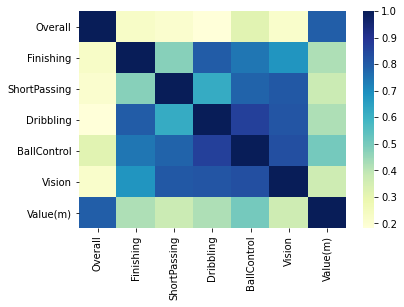

In [54]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='YlGnBu')

In [55]:
#  we notice that all relations are direct
# also we can notice that Value have week relation with other features, as well as Overall to other features
# so we gonna take all features when building our statistical model and see results

# Statistical Model

## Regression Model

In [73]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [74]:
r2 = []
MSE = []
degree =list(range(1,21))

In [75]:
for i in degree:
    Input=[(('Polynomial'), PolynomialFeatures(degree=i)),('mode', linear_model.LinearRegression())]
    pipe=Pipeline(Input)
    pipe.fit(df[['Overall', 'Finishing', 'ShortPassing', 'Dribbling', 'BallControl', 'Vision']], df['Value(m)'])
    Yhat=pipe.predict(df[['Overall', 'Finishing', 'ShortPassing', 'Dribbling', 'BallControl', 'Vision']])
    r2_value=r2_score(df[['Value(m)']], Yhat)
    r2.append(r2_value)
    
    MSE_value=mean_squared_error(df['Value(m)'],Yhat)
    MSE.append(MSE_value)

In [76]:
r2

[0.7270777288479968,
 -5.5272278748425245,
 0.37677783504464746,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [77]:
MSE

[101.58817752436131,
 2429.5898656147283,
 231.97815137387494,
 2.3910262110651187e-16,
 9.431041891004206e-19,
 4.3014818086590574e-19,
 2.922796527351262e-19,
 2.6877197335958556e-19,
 1.0708117801881987e-19,
 3.745567151155372e-20,
 1.3166267560682958e-20,
 8.443788881179416e-21,
 4.375101721128282e-21,
 6.520648648422934e-21,
 1.740833015680605e-21,
 2.1925322599233524e-21,
 6.459703668937122e-21,
 2.8882849052311303e-21,
 1.8511475801204513e-21,
 1.8290000376492126e-21]

In [78]:
# considering results -5 and fourth place of r2 is 1 and goes till the end, also MSE values are very low and goes on, 
# we gonna move on to make sure 

In [79]:
# We will choose 4th degree  polynomial regression
Input=[(('Polynomial'), PolynomialFeatures(degree=4)),('mode', linear_model.LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(df[['Overall', 'Finishing', 'ShortPassing', 'Dribbling', 'BallControl', 'Vision']], df['Value(m)'])
Yhat=pipe.predict(df[['Overall', 'Finishing', 'ShortPassing', 'Dribbling', 'BallControl', 'Vision']])

In [80]:
result_final=pd.DataFrame({'Overall':df['Overall'], 'Finishing':df['Finishing'], 'ShortPassing':df['ShortPassing'],
                          'Dribbling':df['Dribbling'], 'BallControl':df['BallControl'], 'Vision':df['Vision'],
                          'Actual Value':df['Value(m)'], 'Predicted Value':Yhat})
result_final

,Overall,Finishing,ShortPassing,Dribbling,BallControl,Vision,Actual Value,Predicted Value
0,94.0,95,90,97,96,94,110.5,110.5
1,94.0,94,81,88,94,82,77.0,77.0
2,92.0,87,84,96,95,87,118.5,118.5
4,91.0,82,92,86,91,94,102.0,102.0
5,91.0,84,89,95,94,89,93.0,93.0
...,...,...,...,...,...,...,...,...
151,83.0,37,73,65,72,65,19.0,19.0
152,83.0,63,86,78,83,83,26.5,26.5
153,83.0,78,78,82,82,74,30.5,30.5
154,83.0,76,83,80,82,85,25.5,25.5


In [81]:
# Predicted is the same as Avtual!! 

In [82]:
# predict the values of new players

new_players = pd.read_excel('new_players.xlsx')
new_players

,Name,Overall,Finishing,ShortPassing,Dribbling,BallControl,Vision
0,Ronaldo,92,99,80,86,89,80
1,Kaka,88,90,90,87,87,94
2,Beckham,87,88,95,82,85,95
3,Henry,90,95,86,94,87,90


In [83]:
value_pred=pipe.predict(new_players[['Overall', 'Finishing', 'ShortPassing', 'Dribbling', 'BallControl', 'Vision']])
value_pred

array([    4.21775912,  -195.63956151, -1483.84400215,  -209.21524006])

In [84]:
# we can see that its wrong, What happend is we encourted overfitting, coz there are many inputs and they have direct relation and week
# we gonna use one inputs and see results

In [92]:
# New Model on Overall only
r2_new = []
MSE_new = []
degree =list(range(1,21))
for i in degree:
    Input=[(('Polynomial'), PolynomialFeatures(degree=i)),('mode', linear_model.LinearRegression())]
    pipe=Pipeline(Input)
    pipe.fit(df[['Overall']], df['Value(m)'])
    Yhat_new=pipe.predict(df[['Overall']])
    r2_value=r2_score(df[['Value(m)']], Yhat_new)
    r2_new.append(r2_value)
    
    MSE_value=mean_squared_error(df['Value(m)'],Yhat_new)
    MSE_new.append(MSE_value)

In [93]:
result_new=pd.DataFrame({'Overall':df['Overall'], 'Actual Value':df['Value(m)'], 'Predicted Value':Yhat_new})
result_new

,Overall,Actual Value,Predicted Value
0,94.0,110.5,94.204848
1,94.0,77.0,94.204848
2,92.0,118.5,107.727957
4,91.0,102.0,87.363366
5,91.0,93.0,87.363366
...,...,...,...
151,83.0,19.0,31.047561
152,83.0,26.5,31.047561
153,83.0,30.5,31.047561
154,83.0,25.5,31.047561


In [94]:
r2_new

[0.6280649380243636,
 0.6431866968563685,
 0.6653174419564201,
 0.6653313684529913,
 0.6721422395962184,
 0.672950487312004,
 0.6733194183881821,
 0.6736947812460343,
 0.6740762305001375,
 0.6744632629471992,
 0.6748553157266812,
 0.6752517622898577,
 0.6756519097941638,
 0.676054999587116,
 0.676460209513369,
 0.6768666547001863,
 0.6772733910408926,
 0.6776794192161468,
 0.6780836884384637,
 0.6784851073508796]

In [95]:
MSE_new

[138.44309936315707,
 132.8144201270433,
 124.57682906318215,
 124.5716452890621,
 122.03647663509638,
 121.73562756151838,
 121.59830261730315,
 121.4585836105743,
 121.31659910202242,
 121.17253639591264,
 121.02660500235936,
 120.87903813773926,
 120.7300936945768,
 120.58005406141736,
 120.42922526408591,
 120.27793667331598,
 120.12653970812562,
 119.97540633900363,
 119.82492769410959,
 119.67551000253016]

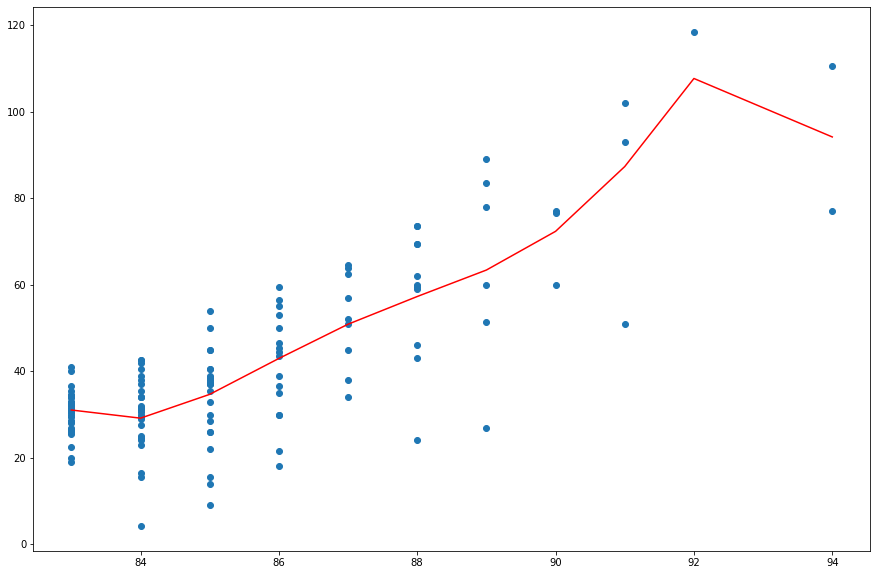

In [96]:
plt.figure(figsize=(15,10))
plt.scatter(df['Overall'], df['Value(m)'])
plt.plot(df['Overall'], Yhat_new, color='r')

In [97]:
# we gonna add another input, BallControll

In [127]:
# New Model on Overall and Ball Controll
r2_new = []
MSE_new = []
degree =list(range(1,21))
for i in degree:
    Input=[(('Polynomial'), PolynomialFeatures(degree=i)),('mode', linear_model.LinearRegression())]
    pipe=Pipeline(Input)
    pipe.fit(df[['Overall', 'BallControl']], df['Value(m)'])
    Yhat_new=pipe.predict(df[['Overall', 'BallControl']])
    r2_value=r2_score(df[['Value(m)']], Yhat_new)
    r2_new.append(r2_value)
    
    MSE_value=mean_squared_error(df['Value(m)'],Yhat_new)
    MSE_new.append(MSE_value)

In [128]:
max(r2_new)

0.8544905695061623

In [129]:
r2_new.index(max(r2_new))

19

In [130]:
# high value at degree 20

In [131]:
result_new=pd.DataFrame({'Overall':df['Overall'], 'BallControl':df['BallControl'], 'Actual Value':df['Value(m)'], 'Predicted Value':Yhat_new})
result_new

,Overall,BallControl,Actual Value,Predicted Value
0,94.0,96,110.5,112.073687
1,94.0,94,77.0,75.948687
2,92.0,95,118.5,113.448687
4,91.0,91,102.0,101.073687
5,91.0,94,93.0,97.979937
...,...,...,...,...
151,83.0,72,19.0,26.669390
152,83.0,83,26.5,33.561968
153,83.0,82,30.5,30.104937
154,83.0,82,25.5,30.102739


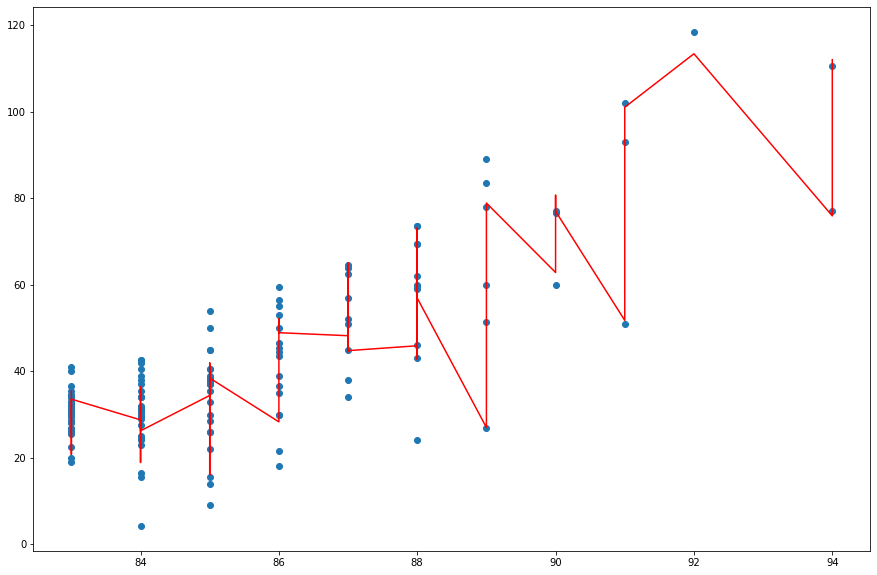

In [137]:
plt.figure(figsize=(15,10))
plt.scatter(df['Overall'], df['Value(m)'])
plt.plot(df['Overall'], Yhat_new, color='r')

In [138]:
# we see its better than before, lets see if there a room for progress
# after trying to add any of the other features we gonna face the same problem of overfitting,
# so we gonna Stop with two Features only (Overall, BallControl)
# we will consider that this is the best model

In [139]:
# Predict Values for New Players, degree is 20
Input=[(('Polynomial'), PolynomialFeatures(degree=20)),('mode', linear_model.LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(df[['Overall', 'BallControl']], df['Value(m)'])
Value_predict2=pipe.predict(new_players[['Overall', 'BallControl']])

In [140]:
Value_predict2

array([173.97993659,  50.83931159,  42.85493659,  96.87056159])

In [143]:
# Append the predicted values to the new_players dataframe
result_pred=new_players.join(pd.DataFrame({'Values':Value_predict2}))

In [144]:
result_pred

,Name,Overall,Finishing,ShortPassing,Dribbling,BallControl,Vision,Values
0,Ronaldo,92,99,80,86,89,80,173.979937
1,Kaka,88,90,90,87,87,94,50.839312
2,Beckham,87,88,95,82,85,95,42.854937
3,Henry,90,95,86,94,87,90,96.870562


In [145]:
result_pred.to_excel('Final_Result.xlsx')